<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median value of owner-occupied homes')

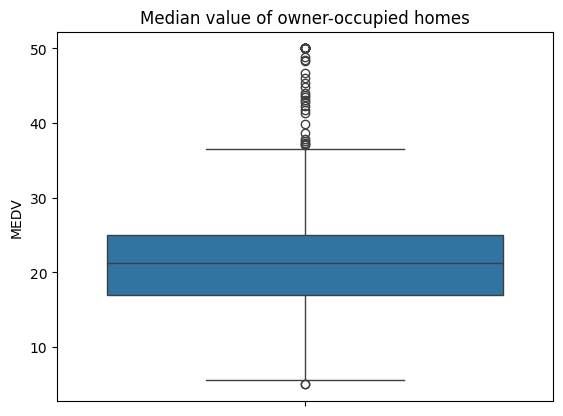

In [6]:
x=sns.boxplot(data=boston_df,y='MEDV')
x.set_title("Median value of owner-occupied homes")

<ipython-input-7-4b87b439a8e5>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(['Far_from_river', 'Near_river'])


[Text(0, 10, '22.09'), Text(0, 10, '28.44')]

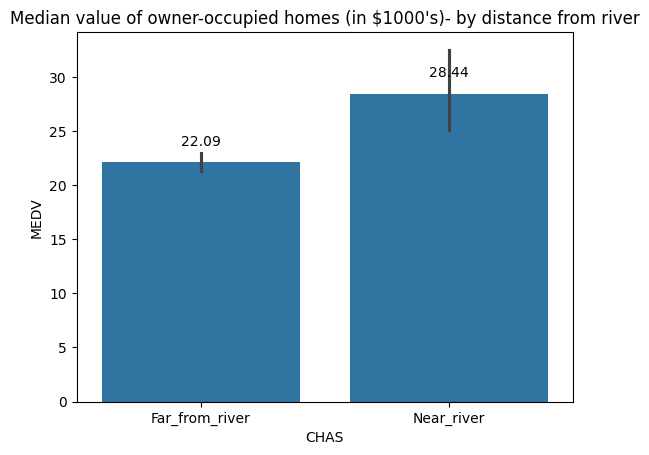

In [7]:
x=sns.barplot(data=boston_df,x='CHAS',y='MEDV')
x.set_xticklabels(['Far_from_river', 'Near_river'])
x.set_title("Median value of owner-occupied homes (in $1000's)- by distance from river")
x.bar_label(x.containers[0],fmt='%.2f',padding=10)

[Text(0, 10, '27.78'), Text(0, 10, '24.95'), Text(0, 10, '19.79')]

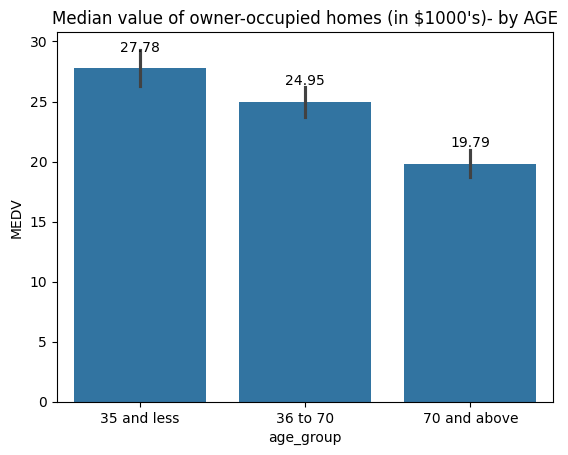

In [8]:
boston_df.loc[(boston_df['AGE']<=35,'age_group')]='35 and less'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='36 to 70'
boston_df.loc[(boston_df['AGE']>=70,'age_group')]='70 and above'

order=['35 and less','36 to 70','70 and above']

x=sns.barplot(data=boston_df,x='age_group',y='MEDV',order=order)
x.set_title("Median value of owner-occupied homes (in $1000's)- by AGE")
x.bar_label(x.containers[0],fmt='%.2f',padding=10)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

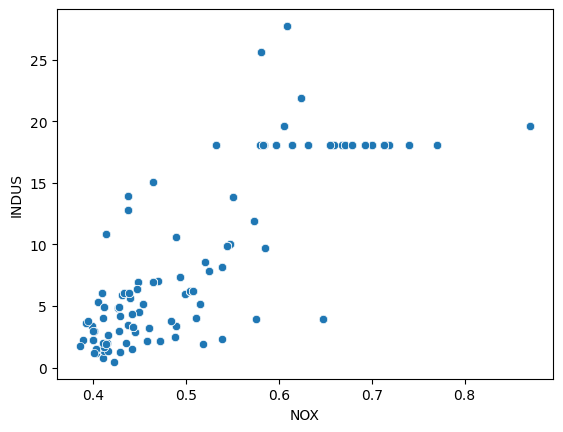

In [9]:
sns.scatterplot(data=boston_df,x='NOX',y='INDUS')

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

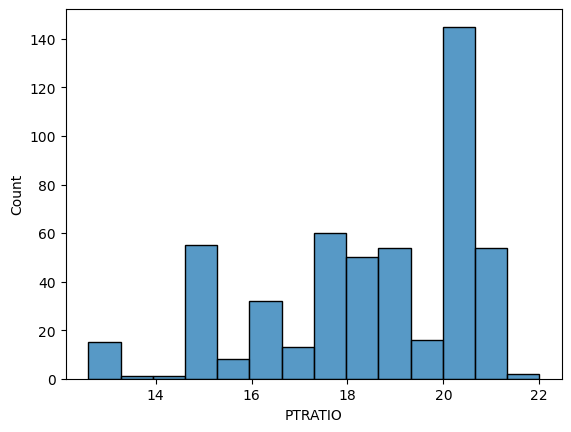

In [10]:
sns.histplot(data=boston_df,x='PTRATIO')

In [12]:
print(f"Statistical information on the two groups:\n{boston_df.groupby('CHAS')['MEDV'].describe().round(2)}")
print("CHAS=0- houses far from the river,\nCHAS=1- houses near the river")

print("""\nLevene test's hypothesis:
Null hypothesis: The median values of variance of houses near the Charles river and houses far from the river are equal
Alternative hypothesis: The median values of variance of the two groups are different\n""")

lev_stat,lev_p=scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'])

print(f"Levene-test result: p-value is {round(lev_p,4)}, we reject the null hypothesis\n")


print("""t-test hypothesis:
Null hypothesis: The difference between houses near the Charles river and houses far from the river in MEDV isn't significant
Alternative hypothesis: There is significant difference between houses near the Charles river and houses far from the river in MEDV""")

stat,p_val=scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'],equal_var=False)

print(f"\nt-test result: p-value is {round(p_val,4)}, we reject the null hypothesis")

Statistical information on the two groups:
      count   mean    std   min   25%   50%    75%   max
CHAS                                                    
0.0   471.0  22.09   8.83   5.0  16.6  20.9  24.80  50.0
1.0    35.0  28.44  11.82  13.4  21.1  23.3  33.15  50.0
CHAS=0- houses far from the river,
CHAS=1- houses near the river

Levene test's hypothesis:
Null hypothesis: The median values of variance of houses near the Charles river and houses far from the river are equal
Alternative hypothesis: The median values of variance of the two groups are different

Levene-test result: p-value is 0.0326, we reject the null hypothesis

t-test hypothesis:
Null hypothesis: The difference between houses near the Charles river and houses far from the river in MEDV isn't significant
Alternative hypothesis: There is significant difference between houses near the Charles river and houses far from the river in MEDV

t-test result: p-value is 0.0036, we reject the null hypothesis


In [13]:

print(f"Statistical info on the 3 AGE groups:\n{boston_df.groupby('age_group')['MEDV'].describe()}\n")


low_group=boston_df.loc[(boston_df['age_group']=='35 and less')]['MEDV']
middle_group=boston_df.loc[(boston_df['age_group']=='36 to 70')]['MEDV']
top_group=boston_df.loc[(boston_df['age_group']=='70 and above')]['MEDV']


print("""ANOVA test hypothesis:
Null hypothesis: Samples in all age groups are from populations with the same values of mean 
Alternative hypothesis: The means of the populations are not the same""")

f_stat,f_pval=scipy.stats.f_oneway(low_group,middle_group,top_group)

print(f"\nANOVA test result: p-value is {f_pval}, we reject the null hypothesis")

Statistical info on the 3 AGE groups:
              count       mean       std   min     25%   50%     75%   max
age_group                                                                 
35 and less    91.0  27.775824  7.638198  17.1  23.050  24.8  31.150  50.0
36 to 70      128.0  24.947656  6.969370  10.2  20.675  22.6  27.425  50.0
70 and above  287.0  19.793380  9.515375   5.0  13.800  18.2  22.550  50.0

ANOVA test hypothesis:
Null hypothesis: Samples in all age groups are from populations with the same values of mean 
Alternative hypothesis: The means of the populations are not the same

ANOVA test result: p-value is 1.7105011022702984e-15, we reject the null hypothesis


In [14]:
print("""Pearson correlation hypothesis:
Null hypothesis: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative hypothesis: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town""")

pear_stat,pear_pval=scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print(f"\nPearson correlation result: pvalue={pear_pval}, statistic= {round(pear_stat,3)}. \nWe reject the null hypothesis- there is strong positive correlation between the 2 variables")

Pearson correlation hypothesis:
Null hypothesis: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative hypothesis: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

Pearson correlation result: pvalue=7.913361061210442e-98, statistic= 0.764. 
We reject the null hypothesis- there is strong positive correlation between the 2 variables


In [15]:
x=boston_df['DIS'] #Independent variable
y=boston_df['MEDV'] #Dependent variable

x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

print(model.summary())

print("\nWe reject the null hypothesis, p-value equal to 0")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        11:03:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0